In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
def build_model():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(13,), name='input'),
        keras.layers.Dense(50, activation='relu', name='h1'),
        keras.layers.Dense(50, activation='relu', name='h2'),
        keras.layers.Dense(1, name='output')
    ], name='Sequential')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse'
    )
    return model

In [3]:
data = pd.read_csv('../../data/cleansed.csv', index_col=0)
data.head()

,Net Income Before Taxes,Total Liabilities,Income Available to Common Excluding Extraordinary Items,avg Volume,Total Liabilities & Shareholders' Equity,Diluted Net Income,Net Income Before Extraordinary Items,Total Assets,Diluted Weighted Average Shares,Total Equity,Total Common Shares Outstanding,Net Income After Taxes,Net Income,High,Low
0,0.256721,0.009259,0.242315,0.015391,0.012484,0.244534,0.242315,0.012484,0.029191,0.063605,0.029990,0.247508,0.242153,208.95,163.38
1,0.253811,0.009970,0.238286,0.021397,0.012557,0.240516,0.238286,0.012557,0.029036,0.059451,0.030301,0.243599,0.238123,182.54,114.04
2,0.246107,0.010004,0.230782,0.017608,0.011840,0.233035,0.230782,0.011840,0.029181,0.054105,0.030165,0.236173,0.230618,219.75,150.58
3,0.255270,0.007716,0.238935,0.016673,0.009660,0.239665,0.238935,0.009660,0.030026,0.053596,0.030239,0.244286,0.237269,259.77,176.87
4,0.206828,0.000024,0.192936,0.001604,0.000356,0.195299,0.192936,0.000356,0.002219,0.037786,0.002317,0.198485,0.192764,379.30,261.27


In [4]:
data = shuffle(data)
data.head()

,Net Income Before Taxes,Total Liabilities,Income Available to Common Excluding Extraordinary Items,avg Volume,Total Liabilities & Shareholders' Equity,Diluted Net Income,Net Income Before Extraordinary Items,Total Assets,Diluted Weighted Average Shares,Total Equity,Total Common Shares Outstanding,Net Income After Taxes,Net Income,High,Low
99,0.209527,0.003059,0.196095,0.010761,0.004030,0.198496,0.196182,0.004030,0.011605,0.044044,0.012334,0.201708,0.196058,46.58,36.84
273,0.246640,0.039134,0.229980,0.003391,0.044956,0.232235,0.229980,0.044956,0.007798,0.098878,0.008040,0.235698,0.229816,506.81,389.42
654,0.197725,0.012749,0.187870,0.016715,0.015061,0.190537,0.188903,0.015061,0.016225,0.059041,0.017053,0.194361,0.189020,71.00,45.50
680,0.210347,0.001843,0.196211,0.005672,0.002477,0.198564,0.196211,0.002477,0.006065,0.040961,0.006326,0.201789,0.196039,196.47,103.01
47,0.246790,0.004058,0.227945,0.013630,0.006441,0.229502,0.227945,0.006441,0.032691,0.054681,0.033557,0.234564,0.226263,169.92,129.10


In [5]:
y = data[['High']]
y.head()

,High
99,46.58
273,506.81
654,71.00
680,196.47
47,169.92


In [6]:
alt_y = (y-y.mean()) / y.std()
alt_y = (alt_y-alt_y.min()) / (alt_y.max()-alt_y.min())
alt_y.head()

,High
99,0.007315
273,0.084282
654,0.011399
680,0.032382
47,0.027942


In [7]:
x = data.drop(['High', 'Low'], axis=1)
print(len(list(x)))
x.head()

13


,Net Income Before Taxes,Total Liabilities,Income Available to Common Excluding Extraordinary Items,avg Volume,Total Liabilities & Shareholders' Equity,Diluted Net Income,Net Income Before Extraordinary Items,Total Assets,Diluted Weighted Average Shares,Total Equity,Total Common Shares Outstanding,Net Income After Taxes,Net Income
99,0.209527,0.003059,0.196095,0.010761,0.004030,0.198496,0.196182,0.004030,0.011605,0.044044,0.012334,0.201708,0.196058
273,0.246640,0.039134,0.229980,0.003391,0.044956,0.232235,0.229980,0.044956,0.007798,0.098878,0.008040,0.235698,0.229816
654,0.197725,0.012749,0.187870,0.016715,0.015061,0.190537,0.188903,0.015061,0.016225,0.059041,0.017053,0.194361,0.189020
680,0.210347,0.001843,0.196211,0.005672,0.002477,0.198564,0.196211,0.002477,0.006065,0.040961,0.006326,0.201789,0.196039
47,0.246790,0.004058,0.227945,0.013630,0.006441,0.229502,0.227945,0.006441,0.032691,0.054681,0.033557,0.234564,0.226263


In [8]:
dataset = tf.data.Dataset.from_tensor_slices((x.values, alt_y.values))
for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.20952699 0.00305931 0.19609458 0.01076127 0.00403023 0.19849603
 0.19618166 0.00403023 0.01160512 0.04404393 0.01233433 0.20170826
 0.19605789], Target: [0.00731492]
Features: [0.24664044 0.03913411 0.22997994 0.00339101 0.04495641 0.23223451
 0.22997994 0.04495641 0.00779792 0.09887801 0.00803956 0.23569806
 0.22981557], Target: [0.08428212]
Features: [0.19772496 0.01274887 0.18786973 0.01671482 0.01506055 0.19053699
 0.18890264 0.01506055 0.01622537 0.05904121 0.01705343 0.19436061
 0.18901981], Target: [0.01139883]
Features: [0.21034652 0.00184259 0.19621068 0.00567243 0.00247697 0.19856412
 0.19621068 0.00247697 0.00606482 0.04096051 0.00632648 0.2017888
 0.19603911], Target: [0.03238198]
Features: [0.24679047 0.00405777 0.22794451 0.01363042 0.00644074 0.22950208
 0.22794451 0.00644074 0.03269125 0.05468051 0.0335574  0.23456407
 0.22626289], Target: [0.02794186]


In [9]:
print(len(dataset))
print(int(len(dataset)*0.75))

1988
1491


In [10]:
test_split = 0.2
test_dataset = dataset.take(int(len(dataset)*test_split)).batch(1)

In [11]:
for feat, targ in test_dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [[0.20952699 0.00305931 0.19609458 0.01076127 0.00403023 0.19849603
  0.19618166 0.00403023 0.01160512 0.04404393 0.01233433 0.20170826
  0.19605789]], Target: [[0.00731492]]
Features: [[0.24664044 0.03913411 0.22997994 0.00339101 0.04495641 0.23223451
  0.22997994 0.04495641 0.00779792 0.09887801 0.00803956 0.23569806
  0.22981557]], Target: [[0.08428212]]
Features: [[0.19772496 0.01274887 0.18786973 0.01671482 0.01506055 0.19053699
  0.18890264 0.01506055 0.01622537 0.05904121 0.01705343 0.19436061
  0.18901981]], Target: [[0.01139883]]
Features: [[0.21034652 0.00184259 0.19621068 0.00567243 0.00247697 0.19856412
  0.19621068 0.00247697 0.00606482 0.04096051 0.00632648 0.2017888
  0.19603911]], Target: [[0.03238198]]
Features: [[0.24679047 0.00405777 0.22794451 0.01363042 0.00644074 0.22950208
  0.22794451 0.00644074 0.03269125 0.05468051 0.0335574  0.23456407
  0.22626289]], Target: [[0.02794186]]


In [12]:
train_dataset = dataset.skip(int(len(dataset)*test_split))
train_dataset = train_dataset.batch(20)
for feat, targ in train_dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [[2.43580733e-01 1.06182658e-02 2.27617909e-01 3.84785774e-02
  8.29569233e-03 2.29879393e-01 2.27617909e-01 8.29569233e-03
  5.92026673e-02 2.47748873e-02 6.19671624e-02 2.32936858e-01
  2.27453040e-01]
 [2.23683743e-01 1.57882798e-02 2.09390072e-01 1.25004397e-02
  1.88278880e-02 2.11704926e-01 2.09569337e-01 1.88278880e-02
  1.81704721e-02 6.59390103e-02 1.88285487e-02 2.15003900e-01
  2.09400615e-01]
 [3.81983225e-01 9.34504128e-03 3.49566776e-01 1.03790118e-01
  3.55404729e-02 3.51471202e-01 3.49566776e-01 3.55404729e-02
  1.43732190e-01 2.27581671e-01 1.49881746e-01 3.54038794e-01
  3.49427937e-01]
 [2.34430778e-01 1.70271211e-02 2.17994793e-01 1.63203361e-02
  1.86384793e-02 2.14292402e-01 2.17998207e-01 1.86384793e-02
  1.62903715e-02 5.64403306e-02 1.66669646e-02 2.23166265e-01
  2.11820355e-01]
 [2.18255803e-01 2.41086824e-02 2.03235307e-01 4.56173099e-02
  2.55416138e-02 2.05568181e-01 2.03593837e-01 2.55416138e-02
  2.94660764e-02 5.91346291e-02 3.06297145e-02 2.0

Epoch 1/1000
80/80 [==============================] - 0s 853us/step - loss: 0.0022
Epoch 2/1000
80/80 [==============================] - 0s 736us/step - loss: 0.0020
Epoch 3/1000
80/80 [==============================] - 0s 644us/step - loss: 0.0019
Epoch 4/1000
80/80 [==============================] - 0s 706us/step - loss: 0.0019
Epoch 5/1000
80/80 [==============================] - 0s 710us/step - loss: 0.0018
Epoch 6/1000
80/80 [==============================] - 0s 735us/step - loss: 0.0018
Epoch 7/1000
80/80 [==============================] - 0s 735us/step - loss: 0.0018
Epoch 8/1000
80/80 [==============================] - 0s 738us/step - loss: 0.0017
Epoch 9/1000
80/80 [==============================] - 0s 697us/step - loss: 0.0017
Epoch 10/1000
80/80 [==============================] - 0s 723us/step - loss: 0.0017
Epoch 11/1000
80/80 [==============================] - 0s 722us/step - loss: 0.0017
Epoch 12/1000
80/80 [==============================] - 0s 684us/step - loss: 0.0017
E

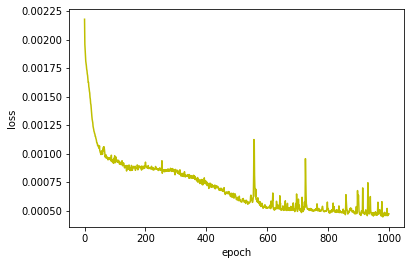

In [13]:
model = build_model()
hist = model.fit(train_dataset, epochs=1000, batch_size=20)
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
result = model.evaluate(test_dataset, return_dict=True)
print(result)

397/397 [==============================] - 0s 493us/step - loss: 0.0013
{'loss': 0.0012672445736825466}


In [15]:
def revert(value):
    value = value * (alt_y.max().values[0] - alt_y.min().values[0]) + alt_y.min().values[0]
    value = value * y.std().values[0] + y.mean().values[0]
    return value

In [23]:
y_oris = []
y_hats = []
errs = []
for feat, targ in test_dataset:
    pred = model.predict(feat, verbose=False)
    y_ori = revert(targ.numpy()[0][0])
    y_hat = revert(pred[0][0])
    err = (y_ori - y_hat) / y_ori * 100
    print(f'Target={y_ori:0.2f}\tPredict={y_hat:0.2f}\tError={err:0.2f}%')
    y_oris.append(y_ori)
    y_hats.append(y_hat)
    errs.append(err/100)
result = model.evaluate(test_dataset, return_dict=True)
print(result)

Target=180.19	Predict=185.12	Error=-2.73%
Target=204.92	Predict=212.19	Error=-3.54%
Target=181.51	Predict=182.12	Error=-0.34%
Target=188.25	Predict=189.44	Error=-0.63%
Target=186.82	Predict=189.80	Error=-1.59%
Target=191.17	Predict=205.02	Error=-7.24%
Target=193.16	Predict=205.74	Error=-6.51%
Target=184.34	Predict=189.80	Error=-2.96%
Target=183.48	Predict=188.50	Error=-2.74%
Target=180.10	Predict=183.57	Error=-1.93%
Target=178.62	Predict=180.79	Error=-1.22%
Target=182.68	Predict=185.59	Error=-1.60%
Target=180.51	Predict=184.61	Error=-2.27%
Target=196.20	Predict=185.11	Error=5.65%
Target=179.09	Predict=181.28	Error=-1.23%
Target=181.47	Predict=186.13	Error=-2.57%
Target=181.71	Predict=182.14	Error=-0.23%
Target=182.05	Predict=187.01	Error=-2.72%
Target=180.50	Predict=223.56	Error=-23.85%
Target=182.31	Predict=181.11	Error=0.66%
Target=182.65	Predict=185.63	Error=-1.63%
Target=184.54	Predict=185.11	Error=-0.31%
Target=180.97	Predict=184.70	Error=-2.06%
Target=186.56	Predict=192.91	Error=

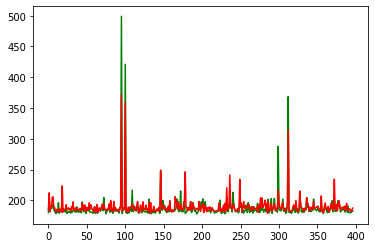

In [24]:
plt.plot(y_oris, 'g')
plt.plot(y_hats, 'r')
plt.show()

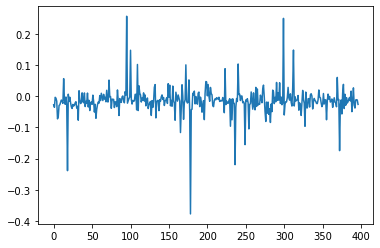

In [25]:
plt.plot(errs)
plt.show()

In [26]:
import pandas as pd

data = {'Target': y_oris, 'Predict': y_hats, 'Errors': errs}
df = pd.DataFrame(data)
df.head()

,Target,Predict,Errors
0,180.193773,185.115010,-0.027311
1,204.924266,212.185869,-0.035436
2,181.505983,182.124769,-0.003409
3,188.248123,189.441889,-0.006341
4,186.821457,189.799588,-0.015941


In [32]:
sorted_df = df.sort_values(by=['Errors'], axis=0)
sorted_df.head()

,Target,Predict,Errors
178,178.845560,246.298258,-0.377156
18,180.501137,223.555526,-0.238527
236,197.918287,241.322097,-0.219302
372,199.616316,234.416720,-0.174336
249,202.601836,234.026939,-0.155108
